In [ ]:
# Download BRIT OCR data to local system
import requests
import os

data_directories = ['data'] # don't need the rest of the directories, they are created by unzipping data files
#,'data/google','data/tesseract']
#,'data/google/primary_label','data/google/full','data/tesseract/primary_label','data/tesseract/full']

# make directory to store data
for data_directory in data_directories:
  try:
    os.mkdir(data_directory)
  except FileExistsError:
    print(f'Directory \'{data_directory}\' already exists.')


In [ ]:
# download Google OCR zip file
url = 'https://github.com/jbest/ocr_quality/raw/main/data/datasets/BRIT/ocr/BRIT_ocr_google.zip'
r = requests.get(url, allow_redirects=True)
with open('data/BRIT_ocr_google.zip', 'wb') as zip_file:
  zip_file.write(r.content)

# download Tesseract OCR zip file 
url = 'https://github.com/jbest/ocr_quality/raw/main/data/datasets/BRIT/ocr/BRIT_ocr_tesseract.zip'
r = requests.get(url, allow_redirects=True)
with open('data/BRIT_ocr_tesseract.zip', 'wb') as zip_file:
  zip_file.write(r.content)

In [ ]:
from zipfile import ZipFile

# unzip Google OCR
zip_path = 'data/BRIT_ocr_google.zip'
data_path = 'data/'

with ZipFile(zip_path, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(path=data_path)

In [ ]:
# unzip Tesseract OCR
zip_path = 'data/BRIT_ocr_tesseract.zip'
data_path = 'data/'

with ZipFile(zip_path, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(path=data_path)

In [ ]:
import glob
from pathlib import Path
 
# print OCR data
for name in glob.glob('data/google/primary_label/*.txt'): 
    file_path = Path(name)
    print(file_path.name, file_path.suffix, file_path.stem)
    with open(file_path) as doc_file:
      text = doc_file.read()
      print(text)

Streaming output truncated to the last 5000 lines.
Pasture; Percila.
HOUSTON COUNTY
Helen M. Gaudin 62
10 April 1983

BRIT480376_370-symbiota_data_19517494_primary_label_ocr.txt .txt BRIT480376_370-symbiota_data_19517494_primary_label_ocr
PLANTS OF TEXAS
40
HERBARIUM OF LAREDO JUNIOR COLLEGE
Nothoscordium bivalve (L.) Britton
Kleberg Co.: Riviera Beach.
In calcareous clay.
9 March 1963
Felix G. Gongora, Juan D. Garza, and
Wm. L. McCart. 8793

BRIT259991_370-symbiota_data_14226945_primary_label_ocr.txt .txt BRIT259991_370-symbiota_data_14226945_primary_label_ocr
! spleml 10/28/29
PLANTS OF TEXAS
HERBARIUM OF SOUTHERN METHODIST UNIVERSITY
Asclepias variegata L.
Bowie Co.: 3 miles west of Noah; infrequent
in open pine woods along a creek.
Stems erect, up to 5 dm; high.
V. L. CORY
56005
May 12, 1949

BRIT338698_370-symbiota_data_26783639_primary_label_ocr.txt .txt BRIT338698_370-symbiota_data_26783639_primary_label_ocr
Louisiana State University
Rudbeckia maxima
Patricia B. Cox
Nutt.
1991


In [ ]:
# find non-dictionary words
# generate local dictionary
nltk.download('punkt')
nltk.download('words')
from nltk.corpus import words
wordlist = words.words()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
from nltk.tokenize import word_tokenize
import string
# print all primary label OCR data

local_words = []
non_dict_tokens = set()

# create punctuation list
punctuation_tokens = [char for char in string.punctuation]

# temp, testing
i = 0
for name in glob.glob('data/google/primary_label/*.txt'): 
    #i += 1
    #if i > 10:
    # break
    file_path = Path(name)
    #print(file_path.name, file_path.suffix, file_path.stem)
    with open(file_path) as doc_file:
      text = doc_file.read()
      tokens = word_tokenize(text)
      print('tokens:', len(tokens))
      #print(text)
      non_dict_count = 0
      for token in tokens:
        try:
          if token.lower() in wordlist:
            pass
            #print(token)
          else:
            #print(token, punctuation_tokens)
            non_dict_count += 1
            non_dict_tokens.add(token.lower())
            if token not in punctuation_tokens:
              local_words.append(token.lower())
        except:
          pass
      #print('non_dict_count:', non_dict_count)
#print(non_dict_tokens)

tokens: 23
tokens: 90
tokens: 59
tokens: 33
tokens: 45
tokens: 29
tokens: 94
tokens: 31
tokens: 48
tokens: 43
tokens: 46
tokens: 49
tokens: 30
tokens: 169
tokens: 43
tokens: 45
tokens: 70
tokens: 41
tokens: 89
tokens: 35
tokens: 30
tokens: 106
tokens: 38
tokens: 173
tokens: 59
tokens: 93
tokens: 46
tokens: 49
tokens: 45
tokens: 83
tokens: 71
tokens: 51
tokens: 44
tokens: 67
tokens: 45
tokens: 75
tokens: 32
tokens: 83
tokens: 47
tokens: 47
tokens: 49
tokens: 57
tokens: 70
tokens: 30
tokens: 40
tokens: 52
tokens: 37
tokens: 50
tokens: 39
tokens: 33
tokens: 90
tokens: 59
tokens: 48
tokens: 60
tokens: 56
tokens: 52
tokens: 100
tokens: 59
tokens: 33
tokens: 33
tokens: 43
tokens: 68
tokens: 84
tokens: 102
tokens: 40
tokens: 56
tokens: 43
tokens: 48
tokens: 70
tokens: 30
tokens: 106
tokens: 37
tokens: 65
tokens: 50
tokens: 45
tokens: 39
tokens: 29
tokens: 54
tokens: 71
tokens: 42
tokens: 43
tokens: 38
tokens: 37
tokens: 48
tokens: 51
tokens: 48
tokens: 121
tokens: 95
tokens: 42
tokens: 36
tok

In [ ]:
print(local_words)

['plants', 'texas', 'agropyron', 'smithii', 'rydb', 'texas', '117', 'lipscomb', 'co.', '5052', 'charles', 'wallis', '7/16/57', 'alibates', 'quarries', 'alfl', 'texas', 'eriogonum', 'longifolium', 'hutchinson', 'lamr', 'fritch', 'fritch', 'fritch', 'slopes', 'red-sandy', 'boulders', 'caprock', '27', '2002', 'nesom', 'robert', "o'kennon", 'lamr201', 'vouchers', 'lamr', 'alfl', 'plants', 'texas', 'ensigermm', 'ricknell', 'ns', 'nlv1953', 'plants', '3', 'dm', 'branches', 'subtended', '5', 'mm', 'kerr', 'co.', '12-3/4', 'miles', 'kerrville', 'v.', 'l.', 'cory', '51716', 'april', '22', '1946', 'plants', 'texas', 'nacogdoches', 'gratiola', 'brevifolia', 'raf', 'stephen', 'f.', 'austin', 'angelina', '31.51627', '-94.768202', 'scrophulariaceae', 'd.c.', 'rudolph', '09-14', '26', '2009', 'tennessee', 'plants', 'minnesota', 'ribes', 'glandulosum', 'grauer', '20', 'miles', 'waubun', 'rt', '113', 'woods', '89-224', '24', '1989', 'v.', 'e.', 'mcneilus', 'ino', 'hiroshima', 'phymatopsis', 'hastatą', 

In [ ]:
# This is the beginning of a test to see if a local dictionary could be developed
# The built in NLTK dictionary is not extensive.
# A local dictionary could be based upon tokens that are very common in the dataset
# The are likely not mis-spelled etc.
import nltk
from nltk import FreqDist

#tokens = nltk.word_tokenize(sentence)
fdist=FreqDist(local_words)
#print(fdist.keys())
#print(fdist.values())

top_words = fdist.most_common(500)
print(top_words)

#TODO
# save fdist to file
# save non_dict_words to file

[('texas', 895), ('plants', 612), ('co.', 354), ('l.', 312), ('miles', 285), ('det', 145), ('h.', 142), ('oklahoma', 123), ('s.', 120), ('april', 115), ('w.', 114), ('r.', 108), ('m.', 95), ('c.', 91), ("''", 90), ('shinners', 89), ('var', 88), ('hwy', 75), ('3', 74), ('2', 68), ('lloyd', 67), ('j.', 66), ('1', 65), ('6', 64), ('5', 62), ('cory', 62), ('e.', 61), ('7', 61), ('10', 61), ('f.', 60), ('v.', 59), ('a.', 58), ('july', 57), ('4', 56), ('nutt', 56), ('woods', 53), ('b.', 52), ('flowers', 51), ('ft.', 51), ('15', 50), ('g.', 49), ('8', 49), ('september', 48), ('d.', 44), ('9', 44), ('30', 43), ('dc', 43), ('t.', 42), ('19', 42), ('n.', 42), ('dm', 41), ('13', 40), ('p.', 38), ('elev', 38), ('21', 37), ('feet', 37), ('october', 37), ('1945', 36), ('12', 34), ('tx', 34), ('11', 33), ('michx', 33), ('26', 32), ('18', 32), ('20', 31), ('14', 31), ('16', 31), ('torr', 31), ('charles', 30), ('22', 30), ('25', 30), ('23', 30), ('1949', 29), ('28', 28), ('texana', 28), ('1946', 27), (

In [ ]:
# local dictionary candidates
frequent_words = list(filter(lambda x: x[1]>=5, fdist.items()))
very_frequent_words = list(filter(lambda x: x[1]>=100, fdist.items()))

In [ ]:
print(fdist)

<FreqDist with 6484 samples and 19166 outcomes>


In [ ]:
infrequent_words = list(filter(lambda x: x[1]<=3, fdist.items()))

In [ ]:
print(len(frequent_words))
print(len(very_frequent_words))
print(len(local_words))
print(infrequent_words)

580
12
19166
[('agropyron', 1), ('smithii', 1), ('117', 1), ('5052', 1), ('7/16/57', 2), ('longifolium', 1), ('red-sandy', 1), ('boulders', 3), ('caprock', 3), ('lamr201', 1), ('ensigermm', 1), ('ricknell', 1), ('ns', 1), ('nlv1953', 1), ('subtended', 1), ('mm', 2), ('12-3/4', 1), ('kerrville', 3), ('51716', 1), ('gratiola', 1), ('brevifolia', 1), ('angelina', 3), ('31.51627', 1), ('-94.768202', 1), ('scrophulariaceae', 2), ('d.c.', 1), ('rudolph', 1), ('09-14', 1), ('minnesota', 1), ('ribes', 2), ('glandulosum', 1), ('grauer', 1), ('waubun', 1), ('113', 2), ('89-224', 1), ('mcneilus', 1), ('ino', 1), ('hiroshima', 2), ('phymatopsis', 1), ('hastatą', 1), ('tiyagaw2', 1), ('shiwabori-mura', 1), ('jicly', 1), ('ses', 1), ("isekc'", 1), ('gapan', 1), ('4.ando', 1), ('cavendishia', 3), ('bracteata', 3), ('st.-hil', 2), ('luteyn', 3), ('ny', 2), ('ericaceae', 2), ('colombia', 1), ('cauca', 1), ('parq', 1), ('nac', 1), ('munchique', 1), ('1-12', 1), ('2100-2440', 1), ("2°40'n", 1), ('76°', 1

In [1]:
# NOTE: using the the following naming convention for column names
# g_p_ = google primary label ocr
# g_f_ = google full image ocr

# load primary label data into pandas dataframe
import pandas as pd
df = pd.DataFrame()

df_google_primary = pd.DataFrame()
for name in glob.glob('data/google/primary_label/*.txt'): 
    file_path = Path(name)
    #print(file_path.name, file_path.suffix, file_path.stem)
    with open(file_path) as doc_file:
      text = doc_file.read()
      tokens = word_tokenize(text)
      row = {'filename': file_path.name, 'g_p_text': text, 'g_p_tokens': tokens}
      df_google_primary = df_google_primary.append(row, ignore_index=True)

NameError: ignored

In [ ]:
df_google_primary.head()

,filename,g_p_text,g_p_tokens
0,BRIT392081_370-symbiota_data_26795478_primary_...,PLANTS OF TEXAS\nAgropyron Smithii Rydb.\nRoad...,"[PLANTS, OF, TEXAS, Agropyron, Smithii, Rydb, ..."
1,BRIT387589_370-symbiota_data_26804196_primary_...,LAKE\n& ALIBATES FLINT QUARRIES NATIONAL MONUM...,"[LAKE, &, ALIBATES, FLINT, QUARRIES, NATIONAL,..."
2,BRIT407146_370-symbiota_data_26798545_primary_...,PLANTS OF TEXAS\nHERBARIUM OF SOUTHERN METHODI...,"[PLANTS, OF, TEXAS, HERBARIUM, OF, SOUTHERN, M..."
3,BRIT486523_370-symbiota_data_26800636_primary_...,PLANTS OF TEXAS\nNacogdoches County\nGratiola ...,"[PLANTS, OF, TEXAS, Nacogdoches, County, Grati..."
4,BRIT518524_370-symbiota_data_26833574_primary_...,HERBARIUM OF THE UNIVERSITY OF TENNESSEE\nPlan...,"[HERBARIUM, OF, THE, UNIVERSITY, OF, TENNESSEE..."


In [ ]:
# load full image data into pandas dataframe
import pandas as pd

df_google_full = pd.DataFrame()
for name in glob.glob('data/google/full/*.txt'): 
    file_path = Path(name)
    with open(file_path) as doc_file:
      text = doc_file.read()
      tokens = word_tokenize(text)
      row = {'filename': file_path.name, 'g_f_text': text, 'g_f_tokens': tokens}
      df_google_full = df_google_full.append(row, ignore_index=True)

In [ ]:
df_google_full.head()

,filename,g_f_text,g_f_tokens
0,BRIT484424_370-symbiota_data_24932400_ocr.txt,BOTANICAL\nRESEARCH\nINSTITUTE OF\n1 2\n3 4\n5...,"[BOTANICAL, RESEARCH, INSTITUTE, OF, 1, 2, 3, ..."
1,BRIT484526_370-symbiota_data_24925160_ocr.txt,BOTANICAL\nRESEARCH\nINSTITUTE OF\nO1 2 3 4 5\...,"[BOTANICAL, RESEARCH, INSTITUTE, OF, O1, 2, 3,..."
2,BRIT366084_370-symbiota_data_24850587_ocr.txt,BOTANICAL\nRESEARCH\nINSTITUTE OF\n1\n2 3 4 5 ...,"[BOTANICAL, RESEARCH, INSTITUTE, OF, 1, 2, 3, ..."
3,BRIT346347_370-symbiota_data_14265166_ocr.txt,BOTANICAL\n2 3\n4 5 6 7 8 9\nRESEARCH\nINSTITU...,"[BOTANICAL, 2, 3, 4, 5, 6, 7, 8, 9, RESEARCH, ..."
4,BRIT342578_370-symbiota_data_14258928_ocr.txt,ВОTANICAL\nRESEARCH\nINSTITUTE OF\n1\n3\n4 5 6...,"[ВОTANICAL, RESEARCH, INSTITUTE, OF, 1, 3, 4, ..."


In [ ]:
# Extract catalog number
import re 
p = re.compile('BRIT\d*')
def get_catalog_number(filename):
  return p.match(filename).group()

# add dictionary word count
def get_dictionary_word_count(tokens):
  dictionary_word_count = 0
  for token in tokens:
    try:
      if token.lower() in wordlist:
        dictionary_word_count += 1
    except:
      pass
  return dictionary_word_count

In [ ]:
# Add catalog number to Google Primary Label
df_google_primary['catalog_number'] = df_google_primary['filename'].apply(lambda x: get_catalog_number(x))

# add token count to Google Primary Label
df_google_primary['g_p_token_count'] = df_google_primary['g_p_tokens'].apply(lambda x: len(x))

# add word count to Google Primary Label
# this is slow, can take 5+ minutes
df_google_primary['g_p_dictionary_word_count'] = df_google_primary['g_p_tokens'].apply(lambda x: get_dictionary_word_count(x))


In [ ]:
df_google_primary.head()

,filename,g_p_text,g_p_tokens,catalog_number,g_p_token_count,g_p_dictionary_word_count
0,BRIT392081_370-symbiota_data_26795478_primary_...,PLANTS OF TEXAS\nAgropyron Smithii Rydb.\nRoad...,"[PLANTS, OF, TEXAS, Agropyron, Smithii, Rydb, ...",BRIT392081,23,8
1,BRIT387589_370-symbiota_data_26804196_primary_...,LAKE\n& ALIBATES FLINT QUARRIES NATIONAL MONUM...,"[LAKE, &, ALIBATES, FLINT, QUARRIES, NATIONAL,...",BRIT387589,90,53
2,BRIT407146_370-symbiota_data_26798545_primary_...,PLANTS OF TEXAS\nHERBARIUM OF SOUTHERN METHODI...,"[PLANTS, OF, TEXAS, HERBARIUM, OF, SOUTHERN, M...",BRIT407146,59,22
3,BRIT486523_370-symbiota_data_26800636_primary_...,PLANTS OF TEXAS\nNacogdoches County\nGratiola ...,"[PLANTS, OF, TEXAS, Nacogdoches, County, Grati...",BRIT486523,33,9
4,BRIT518524_370-symbiota_data_26833574_primary_...,HERBARIUM OF THE UNIVERSITY OF TENNESSEE\nPlan...,"[HERBARIUM, OF, THE, UNIVERSITY, OF, TENNESSEE...",BRIT518524,45,20


In [ ]:
# Add catalog number to Google Full
df_google_full['catalog_number'] = df_google_full['filename'].apply(lambda x: get_catalog_number(x))

# add token count to Google Full
df_google_full['g_f_token_count'] = df_google_full['g_f_tokens'].apply(lambda x: len(x))

# add word count to Google Full
# this is slow, can take 5+ minutes
df_google_full['g_f_dictionary_word_count'] = df_google_full['g_f_tokens'].apply(lambda x: get_dictionary_word_count(x))

In [ ]:
df_google_full.head()

,filename,g_f_text,g_f_tokens,catalog_number,g_f_token_count,g_f_dictionary_word_count
0,BRIT484424_370-symbiota_data_24932400_ocr.txt,BOTANICAL\nRESEARCH\nINSTITUTE OF\n1 2\n3 4\n5...,"[BOTANICAL, RESEARCH, INSTITUTE, OF, 1, 2, 3, ...",BRIT484424,86,40
1,BRIT484526_370-symbiota_data_24925160_ocr.txt,BOTANICAL\nRESEARCH\nINSTITUTE OF\nO1 2 3 4 5\...,"[BOTANICAL, RESEARCH, INSTITUTE, OF, O1, 2, 3,...",BRIT484526,74,28
2,BRIT366084_370-symbiota_data_24850587_ocr.txt,BOTANICAL\nRESEARCH\nINSTITUTE OF\n1\n2 3 4 5 ...,"[BOTANICAL, RESEARCH, INSTITUTE, OF, 1, 2, 3, ...",BRIT366084,70,26
3,BRIT346347_370-symbiota_data_14265166_ocr.txt,BOTANICAL\n2 3\n4 5 6 7 8 9\nRESEARCH\nINSTITU...,"[BOTANICAL, 2, 3, 4, 5, 6, 7, 8, 9, RESEARCH, ...",BRIT346347,91,30
4,BRIT342578_370-symbiota_data_14258928_ocr.txt,ВОTANICAL\nRESEARCH\nINSTITUTE OF\n1\n3\n4 5 6...,"[ВОTANICAL, RESEARCH, INSTITUTE, OF, 1, 3, 4, ...",BRIT342578,139,54


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3277c47510>]],
      dtype=object)

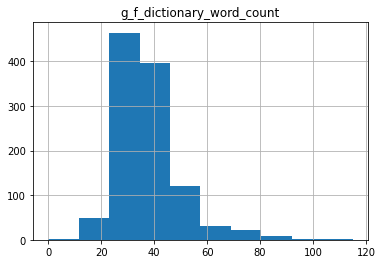

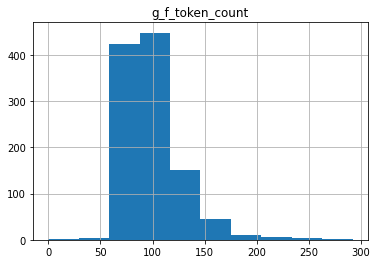

In [ ]:
df_google_full.hist(column='g_f_dictionary_word_count')
df_google_full.hist(column='g_f_token_count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

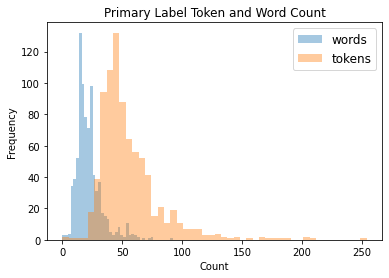

In [ ]:
# Google Primary Label Words and Tokens
# see https://cmdlinetips.com/2019/02/how-to-make-histogram-in-python-with-pandas-and-seaborn/
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df_google_primary ['g_p_dictionary_word_count'], kde=False, label='words')
sns.distplot(df_google_primary['g_p_token_count'],  kde=False,label='tokens')
plt.legend(prop={'size': 12})
plt.title('Primary Label Token and Word Count')
plt.xlabel('Count')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

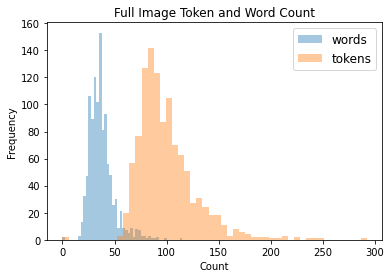

In [ ]:
# Google Full Image Words and Tokens
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df_google_full['g_f_dictionary_word_count'], kde=False, label='words')
sns.distplot(df_google_full['g_f_token_count'],  kde=False,label='tokens')
plt.legend(prop={'size': 12})
plt.title('Full Image Token and Word Count')
plt.xlabel('Count')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

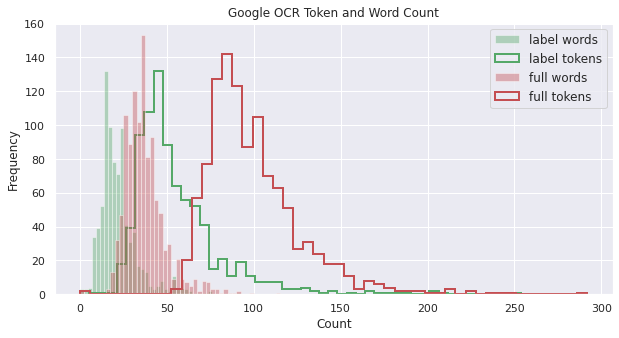

In [ ]:
# Google Primary Label Words and Tokens
# see https://cmdlinetips.com/2019/02/how-to-make-histogram-in-python-with-pandas-and-seaborn/
import matplotlib.pyplot as plt
import seaborn as sns

# uncoment next line to control graph size, but it messes with background color, not sure why
#sns.set(rc={"figure.figsize": (10, 5)})
sns.distplot(df_google_primary['g_p_dictionary_word_count'], kde=False, hist_kws={ "color": "g"}, label='label words')
sns.distplot(df_google_primary['g_p_token_count'], kde=False, hist_kws={"histtype": "step", "linewidth": 2, "alpha": 1, "color": "g"}, label='label tokens')
#sns.distplot(df_google_primary['g_p_token_count'], kde=False, label='label tokens')
sns.distplot(df_google_full['g_f_dictionary_word_count'], kde=False, hist_kws={"color": "r"} , label='full words')
sns.distplot(df_google_full['g_f_token_count'],  kde=False, hist_kws={"histtype": "step", "linewidth": 2, "alpha": 1, "color": "r"}, label='full tokens')
plt.legend(prop={'size': 12})
plt.title('Google OCR Token and Word Count')
plt.xlabel('Count')
plt.ylabel('Frequency')